# import & dataset

In [217]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as pyplot
from matplotlib import pyplot as plt
import datetime

import scipy
from scipy.stats import pearsonr

from haversine import haversine

from sklearn.linear_model import LinearRegression

from functools import reduce

import io
from fbprophet import Prophet
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)                   

from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

warnings.filterwarnings("ignore")
import math

import netCDF4
from netCDF4 import Dataset

import xarray as xr

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

%matplotlib inline
matplotlib.rcParams['font.family']='Malgun Gothic'  # 한글폰트 지원
matplotlib.rcParams['axes.unicode_minus']=False  # 그래프에서 마이너스 기호 깨짐 방지

In [218]:
longi_depth = pd.read_excel("2002년부터 2004년까지 정점 U1에서 U5까지의 데이터.xls", sheet_name="UIG_topography")
station_longi_lat = pd.read_excel("2002년부터 2004년까지 정점 U1에서 U5까지의 데이터.xls", sheet_name="UIG.station")
U1a = pd.read_excel("2002년부터 2004년까지 정점 U1에서 U5까지의 데이터.xls", sheet_name="UIG.U1a")
U1b = pd.read_excel("2002년부터 2004년까지 정점 U1에서 U5까지의 데이터.xls", sheet_name="UIG.U1b")
U2a = pd.read_excel("2002년부터 2004년까지 정점 U1에서 U5까지의 데이터.xls", sheet_name="UIG.U2a")
U2b = pd.read_excel("2002년부터 2004년까지 정점 U1에서 U5까지의 데이터.xls", sheet_name="UIG.U2b")
U3a = pd.read_excel("2002년부터 2004년까지 정점 U1에서 U5까지의 데이터.xls", sheet_name="UIG.U3a")
U3b = pd.read_excel("2002년부터 2004년까지 정점 U1에서 U5까지의 데이터.xls", sheet_name="UIG.U3b")
U4a = pd.read_excel("2002년부터 2004년까지 정점 U1에서 U5까지의 데이터.xls", sheet_name="UIG.U4a")
U4b = pd.read_excel("2002년부터 2004년까지 정점 U1에서 U5까지의 데이터.xls", sheet_name="UIG.U4b")
U5a = pd.read_excel("2002년부터 2004년까지 정점 U1에서 U5까지의 데이터.xls", sheet_name="UIG.U5a")

# U1a~U5a (2002-2004) EDA

## U1a~U5a data 설명

- U1a(1760m) 자료는 2002년 11월 30일 11시부터 2004년 4월 7일 11시까지 존재
- U1b(2090m) 자료는 2002년 11월 30일 11시부터 2004년 4월 7일 13시까지 존재
- U2a(1830m) 자료는 2002년 11월 30일 13시부터 2004년 4월 7일 2시까지 존재
- U2b(2250m) 자료는 2002년 11월 30일 13시부터 2004년 4월 7일 12시까지 존재
- U3a(1690m) 자료는 2002년 11월 29일 17시부터 2004년 4월 7일 11시까지 존재
- U3b(2240m) 자료는 2002년 11월 29일 18시부터 2003년 6월 5일 6시까지 존재
- U4a(1750m) 자료는 2002년 11월 29일 11시부터 2004년 4월 7일 8시까지 존재
- U4b(2130m) 자료는 2002년 11월 29일 9시부터 2003년 10월 20일 0시까지 존재
- U5a(2060m) 자료는 2002년 11월 28일 14시부터 2004년 4월 7일 8시까지 존재

In [219]:
U1a.head(5)

,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s)
0,2002,11,30,11,0,0,1760,0.000002
1,2002,11,30,12,0,0,1760,0.000015
2,2002,11,30,13,0,0,1760,0.000069
3,2002,11,30,14,0,0,1760,0.000218
4,2002,11,30,15,0,0,1760,0.000531


In [220]:
U1a.tail(5)

,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s)
11852,2004,4,7,7,0,0,1760,-1.354307
11853,2004,4,7,8,0,0,1760,-1.453586
11854,2004,4,7,9,0,0,1760,-1.534507
11855,2004,4,7,10,0,0,1760,-1.596332
11856,2004,4,7,11,0,0,1760,-1.639074


In [221]:
U1b.head(5)

,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s)
0,2002,11,30,11,0,0,2090,0.000003
1,2002,11,30,12,0,0,2090,0.000029
2,2002,11,30,13,0,0,2090,0.000136
3,2002,11,30,14,0,0,2090,0.000429
4,2002,11,30,15,0,0,2090,0.001044


In [222]:
U1b.tail(5)

,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s)
11854,2004,4,7,9,0,0,2090,-3.073552
11855,2004,4,7,10,0,0,2090,-3.199265
11856,2004,4,7,11,0,0,2090,-3.294538
11857,2004,4,7,12,0,0,2090,-3.360076
11858,2004,4,7,13,0,0,2090,-3.397167


In [223]:
U2a.head(5)

,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s)
0,2002,11,30,13,0,0,1830,-0.000004
1,2002,11,30,14,0,0,1830,-0.000035
2,2002,11,30,15,0,0,1830,-0.000148
3,2002,11,30,16,0,0,1830,-0.000406
4,2002,11,30,17,0,0,1830,-0.000832


In [224]:
U2a.tail(5)

,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s)
11841,2004,4,6,22,0,0,1830,-5.852380
11842,2004,4,6,23,0,0,1830,-5.646616
11843,2004,4,7,0,0,0,1830,-5.445145
11844,2004,4,7,1,0,0,1830,-5.250342
11845,2004,4,7,2,0,0,1830,-5.063966


In [225]:
U2b.head(5)

,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s)
0,2002,11,30,13,0,0,2250,0.000002
1,2002,11,30,14,0,0,2250,0.000018
2,2002,11,30,15,0,0,2250,0.000070
3,2002,11,30,16,0,0,2250,0.000163
4,2002,11,30,17,0,0,2250,0.000235


In [226]:
U2b.tail(5)

,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s)
11851,2004,4,7,8,0,0,2250,-5.257820
11852,2004,4,7,9,0,0,2250,-5.112829
11853,2004,4,7,10,0,0,2250,-4.983541
11854,2004,4,7,11,0,0,2250,-4.868813
11855,2004,4,7,12,0,0,2250,-4.767882


In [227]:
U3a.head(5)

,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s)
0,2002,11,29,17,0,0,1690,0.000003
1,2002,11,29,18,0,0,1690,0.000027
2,2002,11,29,19,0,0,1690,0.000133
3,2002,11,29,20,0,0,1690,0.000454
4,2002,11,29,21,0,0,1690,0.001238


In [228]:
U3a.tail(5)

,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s)
11870,2004,4,7,7,0,0,1690,-0.388759
11871,2004,4,7,8,0,0,1690,-0.405883
11872,2004,4,7,9,0,0,1690,-0.427643
11873,2004,4,7,10,0,0,1690,-0.452804
11874,2004,4,7,11,0,0,1690,-0.480117


In [229]:
U3b.head(5)

,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s)
0,2002,11,29,18,0,0,2240,-2.485203e-07
1,2002,11,29,19,0,0,2240,-2.358761e-06
2,2002,11,29,20,0,0,2240,-1.106792e-05
3,2002,11,29,21,0,0,2240,-3.492326e-05
4,2002,11,29,22,0,0,2240,-8.494837e-05


In [230]:
U3b.tail(5)

,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s)
4496,2003,6,5,2,0,0,2240,-2.564173
4497,2003,6,5,3,0,0,2240,-2.545127
4498,2003,6,5,4,0,0,2240,-2.523660
4499,2003,6,5,5,0,0,2240,-2.501657
4500,2003,6,5,6,0,0,2240,-2.480770


In [231]:
U4a.head(5)

,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s)
0,2002,11,29,11,0,0,1750,-0.000006
1,2002,11,29,12,0,0,1750,-0.000068
2,2002,11,29,13,0,0,1750,-0.000378
3,2002,11,29,14,0,0,1750,-0.001414
4,2002,11,29,15,0,0,1750,-0.004072


In [232]:
U4a.tail(5)

,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s)
11873,2004,4,7,4,0,0,1750,7.051551
11874,2004,4,7,5,0,0,1750,7.052518
11875,2004,4,7,6,0,0,1750,7.059024
11876,2004,4,7,7,0,0,1750,7.070690
11877,2004,4,7,8,0,0,1750,7.086841


In [233]:
U4b.head(5)

,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s)
0,2002,11,29,9,0,0,2130,-0.000003
1,2002,11,29,10,0,0,2130,-0.000036
2,2002,11,29,11,0,0,2130,-0.000197
3,2002,11,29,12,0,0,2130,-0.000738
4,2002,11,29,13,0,0,2130,-0.002131


In [234]:
U4b.tail(5)

,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s)
7787,2003,10,19,20,0,0,2130,-0.756199
7788,2003,10,19,21,0,0,2130,-0.716262
7789,2003,10,19,22,0,0,2130,-0.655899
7790,2003,10,19,23,0,0,2130,-0.577843
7791,2003,10,20,0,0,0,2130,-0.485059


In [235]:
U5a.head(5)

,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s)
0,2002,11,28,14,0,0,2060,-0.000014
1,2002,11,28,15,0,0,2060,-0.000143
2,2002,11,28,16,0,0,2060,-0.000748
3,2002,11,28,17,0,0,2060,-0.002663
4,2002,11,28,18,0,0,2060,-0.007334


In [236]:
U5a.tail(5)

,Year,Month,Day,Hour,Minute,Second,Depth (meter),Ur Current speed (cm/s)
11894,2004,4,7,4,0,0,2060,13.189926
11895,2004,4,7,5,0,0,2060,13.200081
11896,2004,4,7,6,0,0,2060,13.216570
11897,2004,4,7,7,0,0,2060,13.240629
11898,2004,4,7,8,0,0,2060,13.273335


## null data 확인

In [237]:
dfs = [U1a, U1b, U2a, U2b, U3a, U3b, U4a, U4b, U5a]

for df in dfs:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11857 entries, 0 to 11856
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     11857 non-null  int64  
 1   Month                    11857 non-null  int64  
 2   Day                      11857 non-null  int64  
 3   Hour                     11857 non-null  int64  
 4   Minute                   11857 non-null  int64  
 5   Second                   11857 non-null  int64  
 6   Depth (meter)            11857 non-null  int64  
 7   Ur Current speed (cm/s)  11857 non-null  float64
dtypes: float64(1), int64(7)
memory usage: 741.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11859 entries, 0 to 11858
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     11859 non-null  int64  
 1   Month                    

In [238]:
#checking null data
for name in dfs:
    total = 0
    total += name.isnull().sum()

print(total)
#no null data exists

Year                       0
Month                      0
Day                        0
Hour                       0
Minute                     0
Second                     0
Depth (meter)              0
Ur Current speed (cm/s)    0
dtype: int64


## U1a ~ U5a preprocessing

In [239]:
#preprocessing
def drop(df):
    #drop 'Minute', 'Second' columns
    df = df.drop(['Minute', 'Second'],axis='columns')
    #change Year, Month, Day, Hour columns to 'Time' column(datetime64ns)
    df['Time'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])
    df = df.drop(['Year', 'Month', 'Day', 'Hour','Depth (meter)'],axis='columns')
    return df

def change(df,cnt):
    dfs_str = ['U1a', 'U1b', 'U2a', 'U2b', 'U3a', 'U3b', 'U4a', 'U4b', 'U5a']
    
    #change columns order
    cols = df.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df = df[cols]
    
    #change column name
    name = dfs_str[cnt]
    df.columns=['Time',f'{name} Ur speed(cm/s)']
    return df

cnt = 0
U1a = change(drop(U1a),cnt)
cnt += 1
U1b = change(drop(U1b),cnt)
cnt += 1
U2a = change(drop(U2a),cnt)
cnt += 1
U2b = change(drop(U2b),cnt)
cnt += 1
U3a = change(drop(U3a),cnt)
cnt += 1
U3b = change(drop(U3b),cnt)
cnt += 1
U4a = change(drop(U4a),cnt)
cnt += 1
U4b = change(drop(U4b),cnt)
cnt += 1
U5a = change(drop(U5a),cnt)

In [240]:
data_frames = [U1a, U1b, U2a, U2b, U3a, U3b, U4a, U4b, U5a]
Ur_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Time'], how='outer'), data_frames)
Ur_merged.sort_values(by='Time',inplace=True)
Ur_merged.reset_index(drop=True,inplace=True)

#모든 지점 유속 합친 dataframe 완성
Ur_merged

,Time,U1a Ur speed(cm/s),U1b Ur speed(cm/s),U2a Ur speed(cm/s),U2b Ur speed(cm/s),U3a Ur speed(cm/s),U3b Ur speed(cm/s),U4a Ur speed(cm/s),U4b Ur speed(cm/s),U5a Ur speed(cm/s)
0,2002-11-28 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000014
1,2002-11-28 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000143
2,2002-11-28 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000748
3,2002-11-28 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002663
4,2002-11-28 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007334
...,...,...,...,...,...,...,...,...,...,...
11899,2004-04-07 09:00:00,-1.534507,-3.073552,NaN,-5.112829,-0.427643,NaN,NaN,NaN,NaN
11900,2004-04-07 10:00:00,-1.596332,-3.199265,NaN,-4.983541,-0.452804,NaN,NaN,NaN,NaN
11901,2004-04-07 11:00:00,-1.639074,-3.294538,NaN,-4.868813,-0.480117,NaN,NaN,NaN,NaN
11902,2004-04-07 12:00:00,NaN,-3.360076,NaN,-4.767882,NaN,NaN,NaN,NaN,NaN


# 문제1) 

- <span class="mark">2002-2004년 U1-U3 유속 자료</span>를 이용해서 수심 1500m 아래 western UIG 수송량 계산
- 각 계류 위치의 유속값과 해저 지형의 단면적 곱하기

- <span class="mark">1sv는 10^6m^3/s</span>

- Ur은 cm/s

즉, 단면적 단위는 m^2

- 출처) http://jkess.org/journal/article.php?code=79894

## U1a ~ U3b

In [241]:
western_UIG = Ur_merged[['Time','U1a Ur speed(cm/s)', 'U1b Ur speed(cm/s)', 'U2a Ur speed(cm/s)', 'U2b Ur speed(cm/s)', 'U3a Ur speed(cm/s)', 'U3b Ur speed(cm/s)']]

##  change Ur units with * 0.01, drop rows with all NaNs

In [242]:
#unit change - * 0.01
tmp = western_UIG.select_dtypes(exclude=['datetime64[ns]']) * 0.01

#change column names
tmp.columns = ['U1a Ur speed(m/s)', 'U1b Ur speed(m/s)', 'U2a Ur speed(m/s)', 'U2b Ur speed(m/s)','U3a Ur speed(m/s)', 'U3b Ur speed(m/s)']

#add 'Time' column
tmp['Time'] = western_UIG['Time']

#change column order
cols = tmp.columns.tolist()
cols = cols[-1:] + cols[:-1]
tmp = tmp[cols]

#drop rows with all NaNs
tmp = tmp[(tmp['Time'] >= '2002-11-29 17:00:00')]

#reset index and drop pre-index column
tmp.reset_index(drop=True, inplace=True)

#completed
western_UIG = tmp
western_UIG

,Time,U1a Ur speed(m/s),U1b Ur speed(m/s),U2a Ur speed(m/s),U2b Ur speed(m/s),U3a Ur speed(m/s),U3b Ur speed(m/s)
0,2002-11-29 17:00:00,NaN,NaN,NaN,NaN,2.727068e-08,NaN
1,2002-11-29 18:00:00,NaN,NaN,NaN,NaN,2.685489e-07,-2.485203e-09
2,2002-11-29 19:00:00,NaN,NaN,NaN,NaN,1.328616e-06,-2.358761e-08
3,2002-11-29 20:00:00,NaN,NaN,NaN,NaN,4.542203e-06,-1.106792e-07
4,2002-11-29 21:00:00,NaN,NaN,NaN,NaN,1.238196e-05,-3.492326e-07
...,...,...,...,...,...,...,...
11872,2004-04-07 09:00:00,-0.015345,-0.030736,NaN,-0.051128,-4.276426e-03,NaN
11873,2004-04-07 10:00:00,-0.015963,-0.031993,NaN,-0.049835,-4.528041e-03,NaN
11874,2004-04-07 11:00:00,-0.016391,-0.032945,NaN,-0.048688,-4.801174e-03,NaN
11875,2004-04-07 12:00:00,NaN,-0.033601,NaN,-0.047679,NaN,NaN


## get Cross-Section area (U1a-U3b)

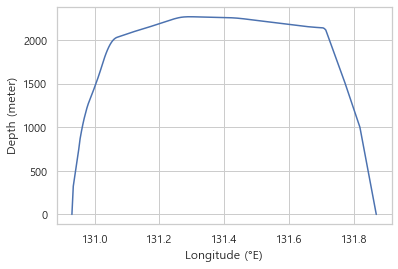

In [243]:
sns.lineplot(data = longi_depth, x= 'Longitude (°E)', y = 'Depth (meter)');

In [244]:
longi_depth[(longi_depth['Depth (meter)'] >= 1460) & (longi_depth['Depth (meter)'] <= 1570)]

,Longitude (°E),Depth (meter)
17,131.001857,1475.080000
18,131.006071,1518.100000
19,131.010286,1562.590000
199,131.768857,1557.560263
200,131.773071,1511.096908
201,131.777286,1464.633553


In [245]:
longi_width = 131.006071 - 131.001857
longi_height = 1518.1 - 1475.08
longi_slope = longi_height/longi_width
k = 1475.08 - (longi_slope)*(131.001857)

d15_Longi = (1500-k)/longi_slope #depth 1500 longitude
print(d15_Longi)

131.0042980246397


In [246]:
station_longi_lat

,Station name,Longitude (°E),Latitude (°N)
0,U1,131.11,37.397933
1,U2,131.26,37.356567
2,U3(EC1),131.43,37.318933
3,U4,131.66,37.298867
4,U5,131.72,37.294683


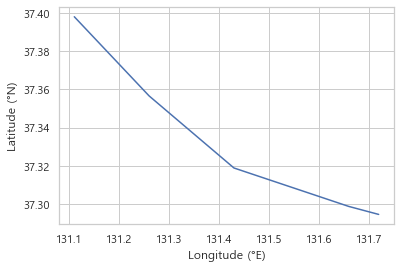

In [247]:
sns.lineplot(data=station_longi_lat,x='Longitude (°E)',y='Latitude (°N)');

In [248]:
#U1과 U2사이 latitude와 longitude가 직선을 보인다 가정하고,앞에서 구한 1500m일때의 longitude를 대입해 1500m일때의 latitude 산출
lat_width = 131.26 - 131.11
lat_height = 37.356567 - 37.397933
lat_slope = lat_height/lat_width
lat_k = 37.397933 - (lat_slope)*(131.11)

d15_Lati = d15_Longi*lat_slope+lat_k #depth 1500 latitude
print(d15_Lati)

37.42708278608504


In [249]:
u1_Longi = float(station_longi_lat[station_longi_lat['Station name'] == 'U1']['Longitude (°E)'])
u1_Lati = float(station_longi_lat[station_longi_lat['Station name'] == 'U1']['Latitude (°N)'])

u2_Longi = float(station_longi_lat[station_longi_lat['Station name'] == 'U2']['Longitude (°E)'])
u2_Lati = float(station_longi_lat[station_longi_lat['Station name'] == 'U2']['Latitude (°N)'])

u3_Longi = float(station_longi_lat[station_longi_lat['Station name'] == 'U3(EC1)']['Longitude (°E)'])
u3_Lati = float(station_longi_lat[station_longi_lat['Station name'] == 'U3(EC1)']['Latitude (°N)'])

u4_Longi = float(station_longi_lat[station_longi_lat['Station name'] == 'U4']['Longitude (°E)'])
u4_Lati = float(station_longi_lat[station_longi_lat['Station name'] == 'U4']['Latitude (°N)'])

d1500 = (d15_Lati, d15_Longi)
u1=(u1_Lati,u1_Longi)
u2=(u2_Lati,u2_Longi)
u3=(u3_Lati,u3_Longi)
u4=(u4_Lati,u4_Longi)

d1500_u1 = haversine(d1500, u1, unit = 'm') #d1500과 u1사이의 거리(m)
u1_u2 = haversine(u1, u2, unit = 'm') #u1과 u2사이의 거리(m)
u2_u3 = haversine(u2, u3, unit = 'm') #u2와 u3사이의 거리(m)
u3_u4 = haversine(u3, u4, unit = 'm') #u3와 u4사이의 거리(m)

In [250]:
print(d1500_u1,u1_u2,u2_u3,u3_u4,sep='\n')

9882.294855250875
14029.736940782306
15601.104336761275
20463.72888585193


### U1 Sv

In [251]:
#1번 삼각형 Section area + 2번 사각형 Section area
area1 = 1/2*(1/2*d1500_u1)*2090
area2 = ((1/2*d1500_u1)+(1/2*u1_u2))*2090
area_U1 = area1+area2
Sv_area1 = western_UIG.iloc[:,1:3] * (area_U1/1000000)

Sv_area1

,U1a Ur speed(m/s),U1b Ur speed(m/s)
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
11872,-0.462678,-0.926724
11873,-0.481319,-0.964629
11874,-0.494207,-0.993355
11875,NaN,-1.013116


### U2 Sv

In [252]:
#3번 사각형 Section area
area_U2 = ((1/2*u1_u2)+(1/2*u2_u3))*2250

Sv_area2 = western_UIG.iloc[:,3:5] * (area_U2/1000000)

Sv_area2

,U2a Ur speed(m/s),U2b Ur speed(m/s)
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
11872,NaN,-1.704346
11873,NaN,-1.661248
11874,NaN,-1.623004
11875,NaN,-1.589359


### U3 Sv

In [253]:
#4번 사각형 Section area
area_U3 = ((1/2*u2_u3)+(1/2*u3_u4))*2240
Sv_area3 = western_UIG.iloc[:,5:7] * (area_U3/1000000)

Sv_area3

,U3a Ur speed(m/s),U3b Ur speed(m/s)
0,0.000001,NaN
1,0.000011,-1.003839e-07
2,0.000054,-9.527654e-07
3,0.000183,-4.470621e-06
4,0.000500,-1.410642e-05
...,...,...
11872,-0.172736,NaN
11873,-0.182899,NaN
11874,-0.193932,NaN
11875,NaN,NaN


### 합치기

In [254]:
res = pd.concat([Sv_area1,Sv_area2,Sv_area3],axis=1)

#get 'Time' column
res['Time'] = western_UIG['Time']

#change column order
cols = res.columns.tolist()
cols = cols[-1:] + cols[:-1]
res = res[cols]

#change column names
res.columns = ['Time', 'U1a Sv', 'U1b Sv', 'U2a Sv', 'U2b Sv','U3a Sv', 'U3b Sv']

### Sv dataframe(U1a~U3b)

In [255]:
#get Total Sv using average of U1~U6
s =(res.iloc[:,1:7].sum(axis=1))/6

seri_concat = pd.concat([s, res['Time']],axis=1)

#change column order
cols = seri_concat.columns.tolist()
cols = cols[-1:] + cols[:-1]
seri_concat = seri_concat[cols]

#change column names
seri_concat.columns = ['Time', 'Total transport(Sv)']

#2002~2004년 유속 U1~U3 자료 이용 - 수심 1500m 아래 western UIG 수송량
seri_concat

,Time,Total transport(Sv)
0,2002-11-29 17:00:00,1.835890e-07
1,2002-11-29 18:00:00,1.791168e-06
2,2002-11-29 19:00:00,8.785582e-06
3,2002-11-29 20:00:00,2.983347e-05
4,2002-11-29 21:00:00,8.100552e-05
...,...,...
11872,2004-04-07 09:00:00,-5.444141e-01
11873,2004-04-07 10:00:00,-5.483493e-01
11874,2004-04-07 11:00:00,-5.507496e-01
11875,2004-04-07 12:00:00,-4.337458e-01


# 문제2)

In [256]:
U3_96_20 = pd.read_csv('1996년부터 2020년까지 U3(EC1)의 데이터.csv') #depth 1800m

## U3_96_20 preprocessing

In [257]:
#preprocessing
U3_96_20 = U3_96_20.drop(['Station', 'Minute', 'Second', 'Depth (meter)'],axis='columns')
U3_96_20['Time'] = pd.to_datetime(U3_96_20[['Year', 'Month', 'Day', 'Hour']])
U3_96_20 = U3_96_20.drop(['Year', 'Month', 'Day', 'Hour'],axis='columns')

#change column order
cols = U3_96_20.columns.tolist()
cols = cols[-1:] + cols[:-1]
U3_96_20 = U3_96_20[cols]

In [258]:
U3_96_20.isnull().sum() #80134 null rows found

Time                           0
Ur Current speed (cm/s)    80134
dtype: int64

In [259]:
#null값 존재 - null값을 포함한 모든 행은 삭제하기로 판단
U3_96_20 = U3_96_20.dropna(axis=0, inplace=False)

#reset index
U3_96_20.reset_index(drop=True, inplace=True)

In [260]:
#2번 문제를 풀기 위해
#동일기간 - 2002년 11월 29일 17시 ~ 2004년 4월 7일 13시까지 자르기
partof_U3_96_20 = U3_96_20[(U3_96_20['Time'] >= '2002-11-29 17:00:00') & (U3_96_20['Time'] <= '2004-04-07 13:00:00')]

#동일기간 Total transport(Sv)와 merge
U3_96_20_and_western_Sv = partof_U3_96_20.merge(seri_concat)
#U3_96_20_and_western_Sv dataframe null 개수 5765

#null값 제외하기로 판단
U3_96_20_and_western_Sv_without_nulls = U3_96_20_and_western_Sv.dropna(axis=0, inplace=False)

In [261]:
# western UIG 수송량과 1800m U3 유속과의 상관관계 계수(pearson correlation)
pearsonr(U3_96_20_and_western_Sv_without_nulls['Ur Current speed (cm/s)'], U3_96_20_and_western_Sv_without_nulls['Total transport(Sv)'])

(0.5206861452169289, 0.0)

In [262]:
U3_96_20_and_western_Sv_without_nulls

,Time,Ur Current speed (cm/s),Total transport(Sv)
0,2002-11-29 19:00:00,1.870974,0.000009
1,2002-11-29 21:00:00,2.434369,0.000081
2,2002-11-29 22:00:00,1.654482,0.000190
3,2002-11-30 06:00:00,0.992245,0.009049
4,2002-11-30 07:00:00,1.047320,0.011503
...,...,...,...
6107,2004-04-06 22:00:00,0.484607,-0.798744
6108,2004-04-07 06:00:00,1.053669,-0.525348
6109,2004-04-07 07:00:00,1.174643,-0.532629
6110,2004-04-07 09:00:00,-1.362262,-0.544414


In [263]:
#선형회귀모델 만들기
model = LinearRegression()

X = U3_96_20_and_western_Sv_without_nulls[['Ur Current speed (cm/s)']]
y = U3_96_20_and_western_Sv_without_nulls['Total transport(Sv)']

model.fit(X, y)

print(model.coef_, model.intercept_)

[0.05759159] -0.17264617887964628


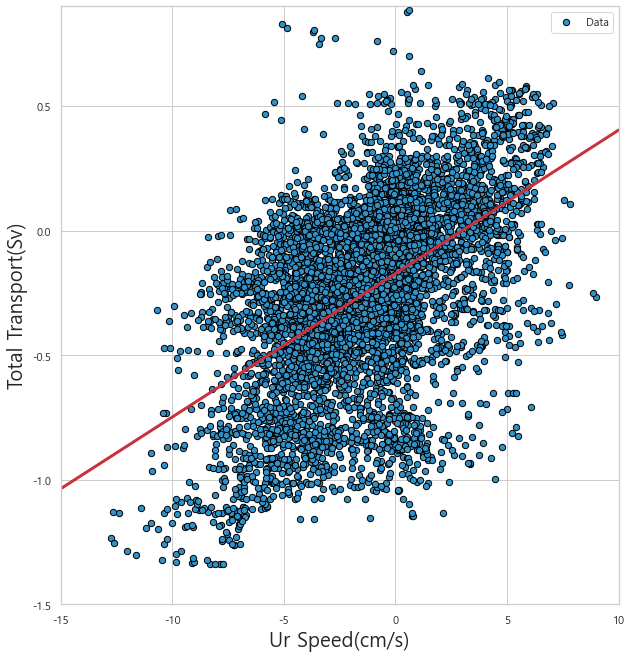

In [264]:
X = U3_96_20_and_western_Sv_without_nulls['Ur Current speed (cm/s)']
y = U3_96_20_and_western_Sv_without_nulls['Total transport(Sv)']

# Initialize layout
fig, ax = plt.subplots(figsize = (10,11))

# Add scatterplot
ax.scatter(X, y, s=40, alpha=1, edgecolors="black",label="Data",c='#3192C9')

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(X, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(-15, 10, num=50)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="#C9313D", lw=3);
ax.legend()
ax.set_xlabel("Ur Speed(cm/s)",fontsize=20)
ax.set_ylabel("Total Transport(Sv)",fontsize=20)
ax.set(ylim=(-1.5, 0.9))
ax.set(xlim=(-15,10));

In [265]:
print(f'Transport(Sv) = {b}Ur(cm/s) {a}')

Transport(Sv) = 0.057591585937154265Ur(cm/s) -0.17264617887964628


# 문제3)

1996년부터 2020년까지 U3 수심 1800m의 유속자료를 2번에서 얻은 Ur과 western UIG 수송량과의 상관관계식에 대입

In [266]:
western_UIG_Sv = U3_96_20['Ur Current speed (cm/s)']*b+a

In [267]:
western_Sv_96_20 = pd.concat([U3_96_20['Time'],western_UIG_Sv],axis=1)
western_Sv_96_20.rename(columns = {'Ur Current speed (cm/s)' : 'western_Sv'}, inplace = True)

#96~20년 U3 수심 1800m western UIG 수송량 - 최종
western_Sv_96_20

,Time,western_Sv
0,1996-11-04 22:00:00,-0.469535
1,1996-11-04 23:00:00,-0.457556
2,1996-11-05 00:00:00,-0.467378
3,1996-11-05 01:00:00,-0.482431
4,1996-11-05 02:00:00,-0.491475
...,...,...
130399,2020-11-11 03:00:00,-0.329958
130400,2020-11-11 04:00:00,-0.202064
130401,2020-11-11 05:00:00,-0.243132
130402,2020-11-11 06:00:00,-0.161082


# 문제4)

## 96~20 남향 수송량 장기 추세 산출

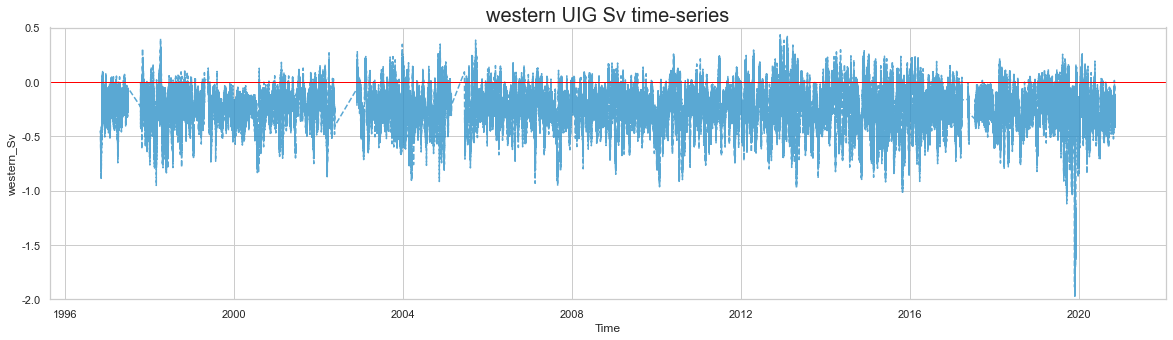

In [268]:
sns.set(rc={'figure.figsize':(20,5)})
sns.set_style('whitegrid')
ax = sns.lineplot(data=western_Sv_96_20, x='Time', y='western_Sv',color='#3192C9',linestyle='--',alpha=0.8)
ax.set_title('western UIG Sv time-series',fontsize=20);
plt.axhline(0.0, 0, 1, color='red', linestyle='-', linewidth=1);
ax.set(ylim=(-2.0, 0.5));

In [269]:
western_Sv_96_20['hour'] = western_Sv_96_20.Time.dt.hour
western_Sv_96_20['year'] = western_Sv_96_20.Time.dt.year
western_Sv_96_20['month'] = western_Sv_96_20.Time.dt.month

### Sv quarterly

#### quarterly 수송량 평균 감소

- 1~3월 봄
- 4~6월 여름
- 7~9월 가을
- 10~12월 겨울

In [270]:
western_Sv_96_20.loc[(western_Sv_96_20.Time.dt.month >= 1) & (western_Sv_96_20.Time.dt.month <= 3), 'quarter'] = 1
western_Sv_96_20.loc[(western_Sv_96_20.Time.dt.month <= 6) & (western_Sv_96_20.Time.dt.month >= 4), 'quarter'] = 2
western_Sv_96_20.loc[(western_Sv_96_20.Time.dt.month <= 9) & (western_Sv_96_20.Time.dt.month >= 7), 'quarter'] = 3
western_Sv_96_20.loc[(western_Sv_96_20.Time.dt.month <= 12) & (western_Sv_96_20.Time.dt.month >= 10), 'quarter'] = 4

#1) 분기별 평균값 - year에 따라 감소 추세 
qc_grouped = western_Sv_96_20.groupby(['year','quarter']).mean().reset_index()
print(pearsonr(qc_grouped['western_Sv'], qc_grouped['year']))

(-0.20192718673717588, 0.04850343060920976)


In [271]:
qc_grouped

,year,quarter,western_Sv,hour,month
0,1996,4.0,-0.271366,11.541945,11.546399
1,1997,1.0,-0.228586,11.417277,1.883246
2,1997,2.0,-0.226750,10.984680,4.996518
3,1997,3.0,-0.131443,9.120000,7.000000
4,1997,4.0,-0.205903,10.469595,11.211149
...,...,...,...,...,...
91,2019,4.0,-0.479043,11.386238,10.898041
92,2020,1.0,-0.236622,10.983134,2.011947
93,2020,2.0,-0.306709,11.258440,5.138533
94,2020,3.0,-0.264562,11.518519,7.995885


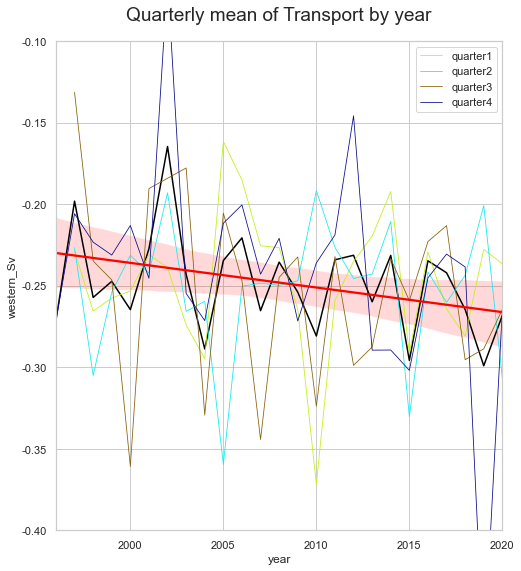

In [272]:
fig,ax=plt.subplots(figsize=(8,9))
#sns.set_palette("PuBuGn_d")
sns.set_style('whitegrid')
sns.lineplot(data=qc_grouped,x=qc_grouped['year'],y=qc_grouped['western_Sv'],ax=ax,ci=None,color='black')
sns.lineplot(data=qc_grouped[qc_grouped['quarter'] == 1],x='year',y='western_Sv',linewidth=0.8,label='quarter1',color='#C2F017')
sns.lineplot(data=qc_grouped[qc_grouped['quarter'] == 2],x='year',y='western_Sv',linewidth=0.8,label='quarter2',color='#17E9F0')
sns.lineplot(data=qc_grouped[qc_grouped['quarter'] == 3],x='year',y='western_Sv',linewidth=0.8,label='quarter3',color='#89620D')
sns.lineplot(data=qc_grouped[qc_grouped['quarter'] == 4],x='year',y='western_Sv',linewidth=0.8,label='quarter4',color='#0D0D89')
sns.regplot(data=qc_grouped,x=qc_grouped['year'],y=qc_grouped['western_Sv'],
            ax=ax,color='red',scatter=False)
ax.axes.set_title('Quarterly mean of Transport by year',fontsize=19,y=1.03)
ax.set(ylim=(-0.4, -0.1))
ax.set(xlim=(1996, 2020));

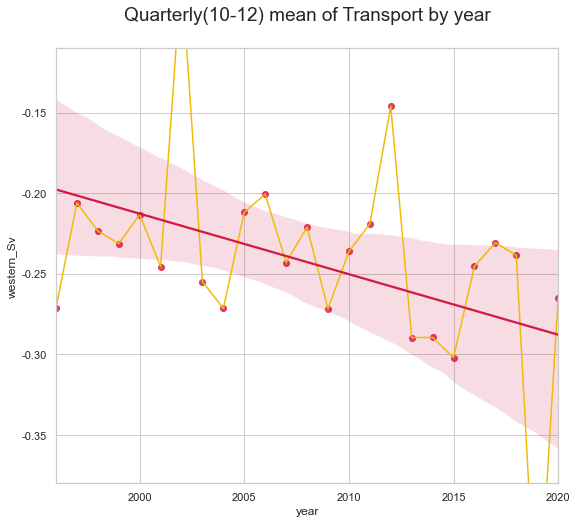

In [273]:
fig,ax=plt.subplots(figsize=(9,8))
sns.lineplot(data=qc_grouped[qc_grouped['quarter'] == 4],x='year',y='western_Sv',linewidth=1.5,color='#F0BB07')
sns.regplot(data=qc_grouped[qc_grouped['quarter'] == 4],x='year',y='western_Sv',color='#D41943')
ax.axes.set_title('Quarterly(10-12) mean of Transport by year',fontsize=19,y=1.05)
ax.set(ylim=(-0.38, -0.11))
ax.set(xlim=(1996, 2020));
#10월~12월 - 시간이 지날수록 수송량이 증가하는 추세가 제일 극명하게 보인다.

In [274]:
pearsonr(qc_grouped[qc_grouped['quarter'] == 4]['western_Sv'], qc_grouped[qc_grouped['quarter'] == 4]['year'])
#(-0.3983582762682373, 0.048572340539383425)

(-0.3983582762682373, 0.048572340539383425)

### 각 월별 수송량 그래프

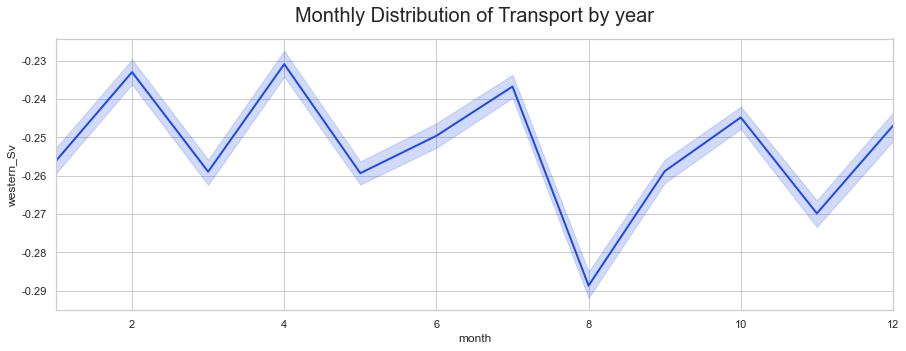

In [275]:
fig,ax=plt.subplots(figsize=(15,5))
sns.set_style('whitegrid')
#sns.set(style='dark',)
sns.lineplot(data=western_Sv_96_20,x='month',y='western_Sv',linewidth=2,color='#1E49E7')
ax.axes.set_title('Monthly Distribution of Transport by year',fontsize=20,y=1.04)
ax.set(xlim=(1, 12));

### quarterly 수송량 표준편차 증가

In [276]:
western_Sv_96_20.loc[(western_Sv_96_20.Time.dt.month >= 1) & (western_Sv_96_20.Time.dt.month <= 3), 'quarter'] = 1
western_Sv_96_20.loc[(western_Sv_96_20.Time.dt.month <= 6) & (western_Sv_96_20.Time.dt.month >= 4), 'quarter'] = 2
western_Sv_96_20.loc[(western_Sv_96_20.Time.dt.month <= 9) & (western_Sv_96_20.Time.dt.month >= 7), 'quarter'] = 3
western_Sv_96_20.loc[(western_Sv_96_20.Time.dt.month <= 12) & (western_Sv_96_20.Time.dt.month >= 10), 'quarter'] = 4

In [277]:
qc_grouped_std = western_Sv_96_20.groupby(['year','quarter']).std().reset_index()
print(pearsonr(qc_grouped_std['western_Sv'], qc_grouped_std['year']))

# 분기별 수송량 표준편차값은 해가 지날수록 증가 - 즉 분기별 각각의 변동폭이 점점 커짐 - 해류 속도가 커짐

(0.2570248188928528, 0.011473011190327047)


In [278]:
qc_grouped_std

,year,quarter,western_Sv,hour,month
0,1996,4.0,0.190726,6.916525,0.498027
1,1997,1.0,0.110922,6.896163,0.801048
2,1997,2.0,0.124036,6.910461,0.810636
3,1997,3.0,0.064857,6.622688,0.000000
4,1997,4.0,0.152362,6.879609,0.747932
...,...,...,...,...,...
91,2019,4.0,0.403007,6.914190,0.792649
92,2020,1.0,0.193690,6.906121,0.823698
93,2020,2.0,0.162737,6.938756,0.821603
94,2020,3.0,0.115654,6.928731,0.813024


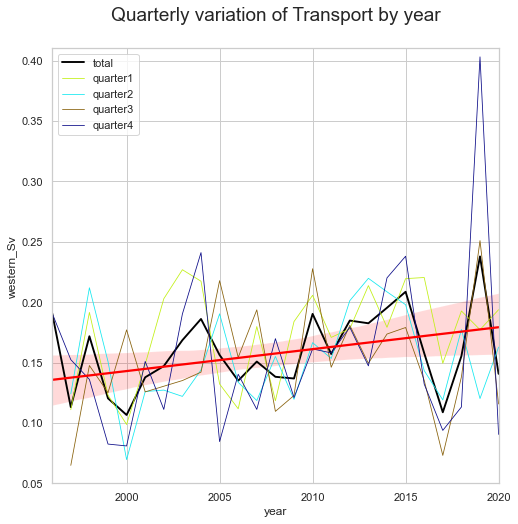

In [279]:
fig,ax=plt.subplots(figsize=(8,8))
sns.set_style('whitegrid')
sns.lineplot(data=qc_grouped_std,x=qc_grouped_std['year'],y=qc_grouped_std['western_Sv'],ax=ax,ci=None,color='black',linewidth=1.9,label='total')
sns.lineplot(data=qc_grouped_std[qc_grouped_std['quarter'] == 1],x='year',y='western_Sv',linewidth=0.8,label='quarter1',color='#C2F017')
sns.lineplot(data=qc_grouped_std[qc_grouped_std['quarter'] == 2],x='year',y='western_Sv',linewidth=0.8,label='quarter2',color='#17E9F0')
sns.lineplot(data=qc_grouped_std[qc_grouped_std['quarter'] == 3],x='year',y='western_Sv',linewidth=0.8,label='quarter3',color='#89620D')
sns.lineplot(data=qc_grouped_std[qc_grouped_std['quarter'] == 4],x='year',y='western_Sv',linewidth=0.8,label='quarter4',color='#0D0D89')
sns.regplot(data=qc_grouped_std,x=qc_grouped_std['year'],y=qc_grouped_std['western_Sv'],
            ax=ax,color='red',scatter=False)
ax.axes.set_title('Quarterly variation of Transport by year',fontsize=19,y=1.05)
ax.set(ylim=(0.05, 0.41))
ax.set(xlim=(1996, 2020));
#위 mean과 종합해보았을 때 최근에 특히 속력이 더 빨라지면서 variation 변화량이 더 증가했음 - 지구 온난화 정도가 더 심해졌음(해류 속도 빨라짐)을 guessing 가능
#최근5년간 모든 quarter의 변동폭이 커짐을 지구온난화 문제와 접목 가능

In [280]:
qc_grouped_std

,year,quarter,western_Sv,hour,month
0,1996,4.0,0.190726,6.916525,0.498027
1,1997,1.0,0.110922,6.896163,0.801048
2,1997,2.0,0.124036,6.910461,0.810636
3,1997,3.0,0.064857,6.622688,0.000000
4,1997,4.0,0.152362,6.879609,0.747932
...,...,...,...,...,...
91,2019,4.0,0.403007,6.914190,0.792649
92,2020,1.0,0.193690,6.906121,0.823698
93,2020,2.0,0.162737,6.938756,0.821603
94,2020,3.0,0.115654,6.928731,0.813024


In [281]:
qc_grouped_std_1 = qc_grouped_std[qc_grouped_std['quarter'] == 1]
std1 = []
std1.append(qc_grouped_std_1[(qc_grouped_std_1['year'] >= 1996) & (qc_grouped_std_1['year'] <= 2000)]['western_Sv'].mean())
std1.append(qc_grouped_std_1[(qc_grouped_std_1['year'] >= 2001) & (qc_grouped_std_1['year'] <= 2005)]['western_Sv'].mean())
std1.append(qc_grouped_std_1[(qc_grouped_std_1['year'] >= 2006) & (qc_grouped_std_1['year'] <= 2010)]['western_Sv'].mean())
std1.append(qc_grouped_std_1[(qc_grouped_std_1['year'] >= 2011) & (qc_grouped_std_1['year'] <= 2015)]['western_Sv'].mean())
std1.append(qc_grouped_std_1[(qc_grouped_std_1['year'] >= 2016) & (qc_grouped_std_1['year'] <= 2020)]['western_Sv'].mean())

In [282]:
std1

[0.13102599114025623,
 0.18551676346130144,
 0.15986264236028142,
 0.19216657216082592,
 0.18664183375127322]

In [283]:
qc_grouped_std_2 = qc_grouped_std[qc_grouped_std['quarter'] == 2]
std2=[]
std2.append(qc_grouped_std_2[(qc_grouped_std_2['year'] >= 1996) & (qc_grouped_std_2['year'] <= 2000)]['western_Sv'].mean())
std2.append(qc_grouped_std_2[(qc_grouped_std_2['year'] >= 2001) & (qc_grouped_std_2['year'] <= 2005)]['western_Sv'].mean())
std2.append(qc_grouped_std_2[(qc_grouped_std_2['year'] >= 2006) & (qc_grouped_std_2['year'] <= 2010)]['western_Sv'].mean())
std2.append(qc_grouped_std_2[(qc_grouped_std_2['year'] >= 2011) & (qc_grouped_std_2['year'] <= 2015)]['western_Sv'].mean())
std2.append(qc_grouped_std_2[(qc_grouped_std_2['year'] >= 2016) & (qc_grouped_std_2['year'] <= 2020)]['western_Sv'].mean())
std2

[0.13909049265756035,
 0.14184210126974903,
 0.1386176098413877,
 0.19611007524757268,
 0.14452240708330388]

In [284]:
qc_grouped_std_3 = qc_grouped_std[qc_grouped_std['quarter'] == 3]
std3=[]
std3.append(qc_grouped_std_3[(qc_grouped_std_3['year'] >= 1996) & (qc_grouped_std_3['year'] <= 2000)]['western_Sv'].mean())
std3.append(qc_grouped_std_3[(qc_grouped_std_3['year'] >= 2001) & (qc_grouped_std_3['year'] <= 2005)]['western_Sv'].mean())
std3.append(qc_grouped_std_3[(qc_grouped_std_3['year'] >= 2006) & (qc_grouped_std_3['year'] <= 2010)]['western_Sv'].mean())
std3.append(qc_grouped_std_3[(qc_grouped_std_3['year'] >= 2011) & (qc_grouped_std_3['year'] <= 2015)]['western_Sv'].mean())
std3.append(qc_grouped_std_3[(qc_grouped_std_3['year'] >= 2016) & (qc_grouped_std_3['year'] <= 2020)]['western_Sv'].mean())
std3

[0.12858829899693805,
 0.1551228998703818,
 0.16154550312767382,
 0.1657336230353585,
 0.14256729580223282]

In [285]:
qc_grouped_std_4 = qc_grouped_std[qc_grouped_std['quarter'] == 4]
std4=[]
std4.append(qc_grouped_std_4[(qc_grouped_std_4['year'] >= 1996) & (qc_grouped_std_4['year'] <= 2000)]['western_Sv'].mean())
std4.append(qc_grouped_std_4[(qc_grouped_std_4['year'] >= 2001) & (qc_grouped_std_4['year'] <= 2005)]['western_Sv'].mean())
std4.append(qc_grouped_std_4[(qc_grouped_std_4['year'] >= 2006) & (qc_grouped_std_4['year'] <= 2010)]['western_Sv'].mean())
std4.append(qc_grouped_std_4[(qc_grouped_std_4['year'] >= 2011) & (qc_grouped_std_4['year'] <= 2015)]['western_Sv'].mean())
std4.append(qc_grouped_std_4[(qc_grouped_std_4['year'] >= 2016) & (qc_grouped_std_4['year'] <= 2020)]['western_Sv'].mean())
std4

[0.12849203570009676,
 0.15554763953033637,
 0.14066365419637428,
 0.18845907483826235,
 0.16650819943819295]

In [286]:
Times = ['1996~2000','2001~2005','2006~2010','2011~2015','2016~2020']
quarter_std = pd.DataFrame({'5 Years - Interval':Times,'Quarter1':std1,'Quarter2':std2,'Quarter3':std3,'Quarter4':std4})
quarter_std

,5 Years - Interval,Quarter1,Quarter2,Quarter3,Quarter4
0,1996~2000,0.131026,0.139090,0.128588,0.128492
1,2001~2005,0.185517,0.141842,0.155123,0.155548
2,2006~2010,0.159863,0.138618,0.161546,0.140664
3,2011~2015,0.192167,0.196110,0.165734,0.188459
4,2016~2020,0.186642,0.144522,0.142567,0.166508


In [287]:
qc_grouped_std_1 = qc_grouped_std[qc_grouped_std['quarter'] == 1]
std1 = []
std1.append(qc_grouped_std_1[(qc_grouped_std_1['year'] >= 2010) & (qc_grouped_std_1['year'] <= 2013)]['western_Sv'].mean())
std1.append(qc_grouped_std_1[(qc_grouped_std_1['year'] >= 2014) & (qc_grouped_std_1['year'] <= 2017)]['western_Sv'].mean())
std1.append(qc_grouped_std_1[(qc_grouped_std_1['year'] >= 2018) & (qc_grouped_std_1['year'] <= 2020)]['western_Sv'].mean())

In [288]:
qc_grouped_std_2 = qc_grouped_std[qc_grouped_std['quarter'] == 2]
std2 = []
std2.append(qc_grouped_std_2[(qc_grouped_std_2['year'] >= 2010) & (qc_grouped_std_2['year'] <= 2013)]['western_Sv'].mean())
std2.append(qc_grouped_std_2[(qc_grouped_std_2['year'] >= 2014) & (qc_grouped_std_2['year'] <= 2017)]['western_Sv'].mean())
std2.append(qc_grouped_std_2[(qc_grouped_std_2['year'] >= 2018) & (qc_grouped_std_2['year'] <= 2020)]['western_Sv'].mean())

In [289]:
qc_grouped_std_3 = qc_grouped_std[qc_grouped_std['quarter'] == 3]
std3 = []
std3.append(qc_grouped_std_3[(qc_grouped_std_3['year'] >= 2010) & (qc_grouped_std_3['year'] <= 2013)]['western_Sv'].mean())
std3.append(qc_grouped_std_3[(qc_grouped_std_3['year'] >= 2014) & (qc_grouped_std_3['year'] <= 2017)]['western_Sv'].mean())
std3.append(qc_grouped_std_3[(qc_grouped_std_3['year'] >= 2018) & (qc_grouped_std_3['year'] <= 2020)]['western_Sv'].mean())

In [290]:
qc_grouped_std_4 = qc_grouped_std[qc_grouped_std['quarter'] == 4]
std4 = []
std4.append(qc_grouped_std_4[(qc_grouped_std_4['year'] >= 2010) & (qc_grouped_std_4['year'] <= 2013)]['western_Sv'].mean())
std4.append(qc_grouped_std_4[(qc_grouped_std_4['year'] >= 2014) & (qc_grouped_std_4['year'] <= 2017)]['western_Sv'].mean())
std4.append(qc_grouped_std_4[(qc_grouped_std_4['year'] >= 2018) & (qc_grouped_std_4['year'] <= 2020)]['western_Sv'].mean())

In [291]:
Times = ['2010~2013','2014~2017','2018~2020']
quarter_std = pd.DataFrame({'Interval':Times,'Quarter1':std1,'Quarter2':std2,'Quarter3':std3,'Quarter4':std4})

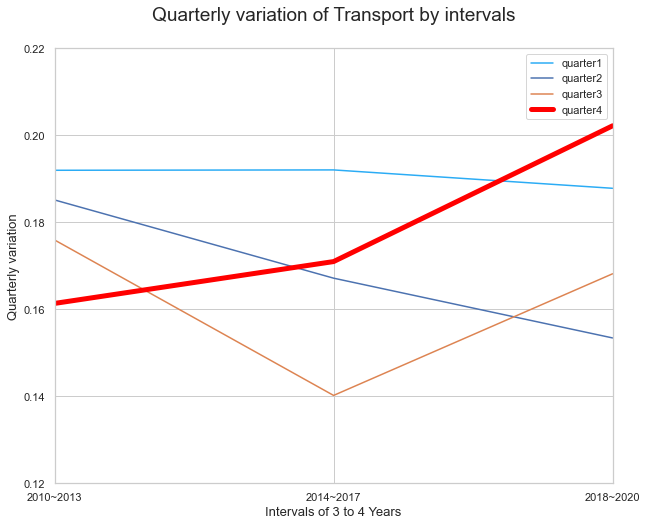

In [292]:
fig,ax=plt.subplots(figsize=(10,8))
ax = sns.lineplot(data=quarter_std,x=quarter_std['Interval'],y=quarter_std['Quarter1'],label='quarter1',color='#2BACF5')
ax = sns.lineplot(data=quarter_std,x=quarter_std['Interval'],y=quarter_std['Quarter2'],label='quarter2')
ax = sns.lineplot(data=quarter_std,x=quarter_std['Interval'],y=quarter_std['Quarter3'],label='quarter3')
ax = sns.lineplot(data=quarter_std,x=quarter_std['Interval'],y=quarter_std['Quarter4'],label='quarter4',linewidth=5,color='red');
ax.axes.set_title('Quarterly variation of Transport by intervals',fontsize=19,y=1.05)
ax.set_ylabel("Quarterly variation",fontsize=13)
ax.set_xlabel("Intervals of 3 to 4 Years",fontsize=13)
ax.set(ylim=(0.12, 0.22))
ax.set(xlim=(0, 2));
#유난히 겨울 variation이 커짐 주목

## 2030년 수송량값 산출

### Prophet FB prediction

In [293]:
western_Sv_ts = western_Sv_96_20[['Time','western_Sv']]
western_Sv_ts.columns = ['ds','y']

model = Prophet(interval_width=0.1,weekly_seasonality=False, daily_seasonality=False) #avoid overfitting
model.fit(western_Sv_ts)

future = model.make_future_dataframe(periods = 7200, freq = 'D') #predict 20years in quarter mode
forecast = model.predict(future)

In [294]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-11-04 22:00:00,-0.257210,-0.334265,-0.286851,-0.257210,-0.257210,-0.051911,-0.051911,-0.051911,-0.051911,-0.051911,-0.051911,0.0,0.0,0.0,-0.309122
1,1996-11-04 23:00:00,-0.257206,-0.334611,-0.292169,-0.257206,-0.257206,-0.051894,-0.051894,-0.051894,-0.051894,-0.051894,-0.051894,0.0,0.0,0.0,-0.309099
2,1996-11-05 00:00:00,-0.257201,-0.327925,-0.287730,-0.257201,-0.257201,-0.051875,-0.051875,-0.051875,-0.051875,-0.051875,-0.051875,0.0,0.0,0.0,-0.309076
3,1996-11-05 01:00:00,-0.257196,-0.334604,-0.290040,-0.257196,-0.257196,-0.051855,-0.051855,-0.051855,-0.051855,-0.051855,-0.051855,0.0,0.0,0.0,-0.309051
4,1996-11-05 02:00:00,-0.257191,-0.321278,-0.283772,-0.257191,-0.257191,-0.051834,-0.051834,-0.051834,-0.051834,-0.051834,-0.051834,0.0,0.0,0.0,-0.309025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137599,2040-07-25 07:00:00,-0.629704,-0.938801,-0.277162,-0.956917,-0.264226,-0.009634,-0.009634,-0.009634,-0.009634,-0.009634,-0.009634,0.0,0.0,0.0,-0.639338
137600,2040-07-26 07:00:00,-0.629750,-0.973273,-0.332470,-0.956990,-0.264302,-0.011936,-0.011936,-0.011936,-0.011936,-0.011936,-0.011936,0.0,0.0,0.0,-0.641685
137601,2040-07-27 07:00:00,-0.629795,-0.935433,-0.305498,-0.957063,-0.264377,-0.013979,-0.013979,-0.013979,-0.013979,-0.013979,-0.013979,0.0,0.0,0.0,-0.643774
137602,2040-07-28 07:00:00,-0.629841,-0.977219,-0.250660,-0.957137,-0.264453,-0.015757,-0.015757,-0.015757,-0.015757,-0.015757,-0.015757,0.0,0.0,0.0,-0.645598


In [295]:
#예측값 dataframe
predicted = forecast[forecast['ds'] >= '2020-11-12']
predicted

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
130404,2020-11-12 07:00:00,-0.301735,-0.357801,-0.307704,-0.301735,-0.301735,-0.033414,-0.033414,-0.033414,-0.033414,-0.033414,-0.033414,0.0,0.0,0.0,-0.335149
130405,2020-11-13 07:00:00,-0.301780,-0.352046,-0.302884,-0.301780,-0.301780,-0.029083,-0.029083,-0.029083,-0.029083,-0.029083,-0.029083,0.0,0.0,0.0,-0.330863
130406,2020-11-14 07:00:00,-0.301826,-0.342688,-0.300775,-0.301826,-0.301826,-0.024525,-0.024525,-0.024525,-0.024525,-0.024525,-0.024525,0.0,0.0,0.0,-0.326351
130407,2020-11-15 07:00:00,-0.301871,-0.344966,-0.299135,-0.301871,-0.301871,-0.019823,-0.019823,-0.019823,-0.019823,-0.019823,-0.019823,0.0,0.0,0.0,-0.321695
130408,2020-11-16 07:00:00,-0.301917,-0.335592,-0.290623,-0.301917,-0.301917,-0.015061,-0.015061,-0.015061,-0.015061,-0.015061,-0.015061,0.0,0.0,0.0,-0.316978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137599,2040-07-25 07:00:00,-0.629704,-0.938801,-0.277162,-0.956917,-0.264226,-0.009634,-0.009634,-0.009634,-0.009634,-0.009634,-0.009634,0.0,0.0,0.0,-0.639338
137600,2040-07-26 07:00:00,-0.629750,-0.973273,-0.332470,-0.956990,-0.264302,-0.011936,-0.011936,-0.011936,-0.011936,-0.011936,-0.011936,0.0,0.0,0.0,-0.641685
137601,2040-07-27 07:00:00,-0.629795,-0.935433,-0.305498,-0.957063,-0.264377,-0.013979,-0.013979,-0.013979,-0.013979,-0.013979,-0.013979,0.0,0.0,0.0,-0.643774
137602,2040-07-28 07:00:00,-0.629841,-0.977219,-0.250660,-0.957137,-0.264453,-0.015757,-0.015757,-0.015757,-0.015757,-0.015757,-0.015757,0.0,0.0,0.0,-0.645598


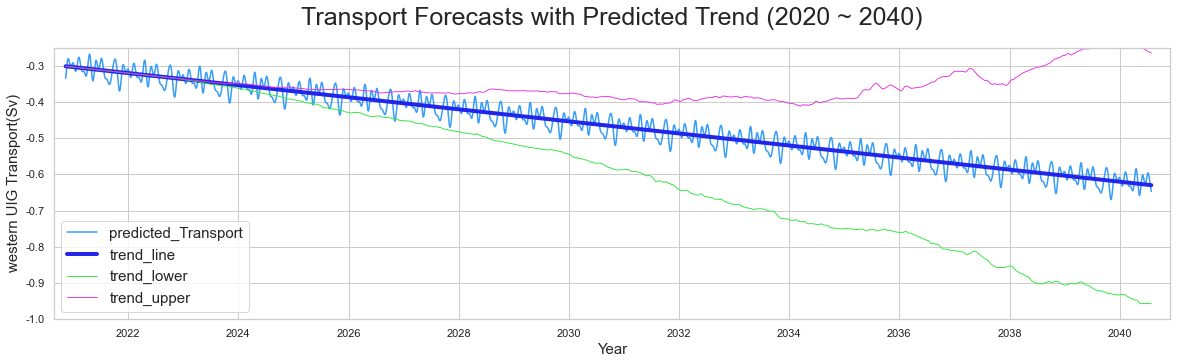

In [296]:
sns.set(rc={'figure.figsize':(20,5)})
sns.set_style('whitegrid')
ax = sns.lineplot(data=predicted,x='ds',y='yhat',color='#379DF7',label='predicted_Transport',linewidth=1.5);
ax = sns.lineplot(data=predicted,x='ds',y='trend',color='#2326EA',linewidth=4,label='trend_line')
ax = sns.lineplot(data=predicted,x='ds',y='trend_lower',color='#2EE73C',linewidth=0.9,label='trend_lower')
ax = sns.lineplot(data=predicted,x='ds',y='trend_upper',color='#E72EDF',linewidth=0.9,label='trend_upper')
ax.set(ylim=(-1, -0.25));
ax.set(xlim=(18500,25900))
ax.set_xlabel("Year",fontsize=15)
ax.set_ylabel("western UIG Transport(Sv)",fontsize=15)
ax.legend(loc="lower left",fontsize=15);
ax.axes.set_title('Transport Forecasts with Predicted Trend (2020 ~ 2040)',fontsize=25,y=1.06);

### 2030년 수치 예측

In [297]:
#1분기 평균
predicted_2030s_q4 = forecast[(forecast['ds'] >= '2030-01-01') & (forecast['ds'] < '2030-04-01')]
predicted_2030s_q4['yhat'].mean()

-0.4558614365657785

In [298]:
#2분기 평균
predicted_2030s_q1 = forecast[(forecast['ds'] >= '2030-04-01') & (forecast['ds'] < '2030-07-01')]
predicted_2030s_q1['yhat'].mean()

-0.4529813050719812

In [299]:
#3분기 평균
predicted_2030s_q2 = forecast[(forecast['ds'] >= '2030-07-01') & (forecast['ds'] < '2030-10-01')]
predicted_2030s_q2['yhat'].mean()

-0.4708679386653422

In [300]:
#4분기 평균
predicted_2030s_q3 = forecast[(forecast['ds'] >= '2030-10-01') & (forecast['ds'] < '2031-01-01')]
predicted_2030s_q3['yhat'].mean()

-0.46864896603814943

In [301]:
for_barplot_predicted_2030s = pd.DataFrame({'Time':['~2030-04-01', '~2030-07-01', '~2030-10-01','~2031-01-01'],
                             'expected quarterly mean':[predicted_2030s_q4['yhat'].mean(), predicted_2030s_q1['yhat'].mean(), predicted_2030s_q2['yhat'].mean(),predicted_2030s_q3['yhat'].mean()]})
for_barplot_predicted_2030s

,Time,expected quarterly mean
0,~2030-04-01,-0.455861
1,~2030-07-01,-0.452981
2,~2030-10-01,-0.470868
3,~2031-01-01,-0.468649


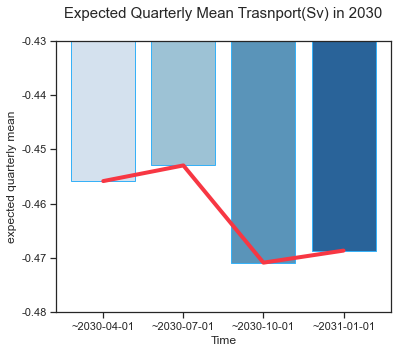

In [302]:
sns.set(rc={'figure.figsize':(6,5)})
sns.set_style('ticks')
ax = sns.barplot(data=for_barplot_predicted_2030s,x='Time',y='expected quarterly mean',palette = 'Blues',edgecolor = '#37B1F7')
ax = sns.lineplot(data=for_barplot_predicted_2030s,x='Time',y='expected quarterly mean',linewidth=4,color='#F73743')
ax.set(ylim=(-0.48, -0.43));
ax.axes.set_title('Expected Quarterly Mean Trasnport(Sv) in 2030',fontsize=15,y=1.06);

In [303]:
predicted['year'] = predicted['ds'].dt.year
predicted.loc[(predicted.ds.dt.month >= 1) & (predicted.ds.dt.month <= 3), 'quarter'] = 1
predicted.loc[(predicted.ds.dt.month <= 4) & (predicted.ds.dt.month >= 6), 'quarter'] = 2
predicted.loc[(predicted.ds.dt.month <= 7) & (predicted.ds.dt.month >= 9), 'quarter'] = 3
predicted.loc[(predicted.ds.dt.month <= 10) & (predicted.ds.dt.month >= 12), 'quarter'] = 4

predicted_qc_grouped = predicted.groupby(['year','quarter'])['yhat'].mean().reset_index()
print(pearsonr(predicted_qc_grouped['yhat'], predicted_qc_grouped['year']))

(-0.999999759533908, 2.5528730973033904e-58)


In [304]:
predicted_qc_grouped

,year,quarter,yhat
0,2021,1.0,-0.306111
1,2022,1.0,-0.322668
2,2023,1.0,-0.339224
3,2024,1.0,-0.355998
4,2025,1.0,-0.372707
5,2026,1.0,-0.389265
6,2027,1.0,-0.405821
7,2028,1.0,-0.422594
8,2029,1.0,-0.439304
9,2030,1.0,-0.455861


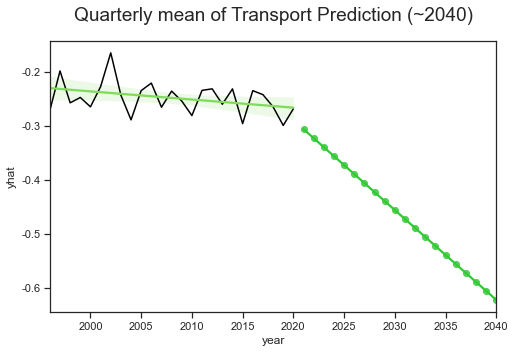

In [305]:
fig,ax=plt.subplots(figsize=(8,5))
sns.set_style('whitegrid')
sns.lineplot(data=qc_grouped,x=qc_grouped['year'],y=qc_grouped['western_Sv'],ax=ax,ci=None,color='black')
sns.regplot(data=qc_grouped,x=qc_grouped['year'],y=qc_grouped['western_Sv'],
            ax=ax,color='#7FDC59',scatter=False)
sns.regplot(data=predicted_qc_grouped,x=predicted_qc_grouped['year'],y=predicted_qc_grouped['yhat'],color='#31C933',ax=ax)
ax.axes.set_title('Quarterly mean of Transport Prediction (~2040)',fontsize=19,y=1.05)
ax.set(xlim=(1996, 2040));

In [306]:
se = np.square(forecast.loc[:, 'yhat'][:len(western_Sv_ts)] - western_Sv_ts['y'])
mse = np.mean(se)
rmse = np.sqrt(mse)
print(rmse)

0.17407568369514484


In [307]:
NRMSE = rmse/(western_Sv_ts['y'].max()-western_Sv_ts['y'].min())*100
print(NRMSE)

7.197726981443073


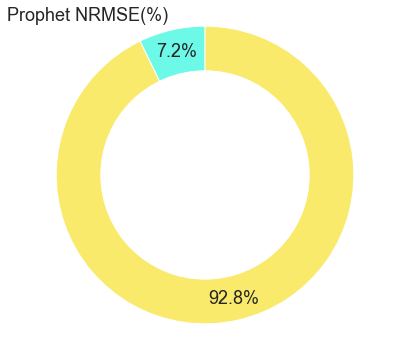

In [308]:
data = [NRMSE, 100-NRMSE]
labels = ['Prophet NRMSE(%)','']
#explode = [0,0.3]
colors = ['#6CF9E8','#F9EA6C']

fig1, ax1 = plt.subplots()
ax1.pie(data, labels = labels, colors = colors, autopct='%.1f%%',startangle=90,pctdistance=0.85,textprops={'fontsize': 18})

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

# 추가 외부 데이터

## 1500m 수온 트렌드

In [309]:
#nc파일 위치에 맞게 경로 모두 바꾸기
file_path1 = "C:/Users/harry/OneDrive/Desktop/81813/leg01/OS_EC1_199611_D_RCM7-1000m.nc"
file_path2 = "C:/Users/harry/OneDrive/Desktop/81813/leg01/OS_EC1_199611_D_RCM7-1320m.nc"
file_path3 = "C:/Users/harry/OneDrive/Desktop/81813/leg01/OS_EC1_199611_D_VACM-1910m.nc"
file_path4 = "C:/Users/harry/OneDrive/Desktop/81813/leg02/OS_EC1_199710_D_RCM7-1400m.nc"
file_path5 = "C:/Users/harry/OneDrive/Desktop/81813/leg03/OS_EC1_199810_D_RCM8-1400m.nc"
file_path6 = "C:/Users/harry/OneDrive/Desktop/81813/leg03/OS_EC1_199810_D_RCM8-1930m.nc"
file_path7 = "C:/Users/harry/OneDrive/Desktop/81813/leg04/OS_EC1_199905_D_RCM8-1390m.nc"
file_path8 = "C:/Users/harry/OneDrive/Desktop/81813/leg04/OS_EC1_199905_D_RCM8-2330m.nc"
file_path9 = "C:/Users/harry/OneDrive/Desktop/81813/leg05/OS_EC1_199910_D_RCM8-1400m.nc"
file_path10 = "C:/Users/harry/OneDrive/Desktop/81813/leg05/OS_EC1_199910_D_RCM8-2300m.nc"
file_path11 = "C:/Users/harry/OneDrive/Desktop/81813/leg06/OS_EC1_200005_D_RCM8-1400m.nc"
file_path12 = "C:/Users/harry/OneDrive/Desktop/81813/leg06/OS_EC1_200005_D_RCM8-2300m.nc"
file_path13 = "C:/Users/harry/OneDrive/Desktop/81813/leg07/OS_EC1_200104_D_RCM7-1400m.nc"
file_path14 = "C:/Users/harry/OneDrive/Desktop/81813/leg07/OS_EC1_200104_D_RCM8-2300m.nc"
file_path15 = "C:/Users/harry/OneDrive/Desktop/81813/leg08/OS_EC1_200110_D_RCM8-1360m.nc"
file_path16 = "C:/Users/harry/OneDrive/Desktop/81813/leg08/OS_EC1_200110_D_RCM8-2230m.nc"
file_path17 = "C:/Users/harry/OneDrive/Desktop/81813/leg09/OS_EC1_200211_D_RCM7-1000m.nc"
file_path18 = "C:/Users/harry/OneDrive/Desktop/81813/leg09/OS_EC1_200211_D_RCM8-1360m.nc"
file_path19 = "C:/Users/harry/OneDrive/Desktop/81813/leg09/OS_EC1_200211_D_RCM8-1690m.nc"
file_path20 = "C:/Users/harry/OneDrive/Desktop/81813/leg09/OS_EC1_200211_D_RCM8-2240m.nc"
file_path21 = "C:/Users/harry/OneDrive/Desktop/81813/leg10/OS_EC1_200404_D_RCM8-1400m.nc"
file_path22 = "C:/Users/harry/OneDrive/Desktop/81813/leg10/OS_EC1_200404_D_RCM11-2250m.nc"
file_path23 = "C:/Users/harry/OneDrive/Desktop/81813/leg11/OS_EC1_200506_D_RCM8-1430m.nc"
file_path24 = "C:/Users/harry/OneDrive/Desktop/81813/leg11/OS_EC1_200506_D_RCM11-2360m.nc"
file_path25 = "C:/Users/harry/OneDrive/Desktop/81813/leg12/OS_EC1_200605_D_RCM9-1380m.nc"
file_path26 = "C:/Users/harry/OneDrive/Desktop/81813/leg12/OS_EC1_200605_D_RCM11-2055m.nc"
file_path27 = "C:/Users/harry/OneDrive/Desktop/81813/leg12/OS_EC1_200605_D_SBE39-2100m.nc"
file_path28 = "C:/Users/harry/OneDrive/Desktop/81813/leg13/OS_EC1_200709_D_RCM9-1450m.nc"
file_path29 = "C:/Users/harry/OneDrive/Desktop/81813/leg13/OS_EC1_200709_D_RCM11-2130m.nc"
file_path30 = "C:/Users/harry/OneDrive/Desktop/81813/leg14/OS_EC1_200811_D_RCM9-1380m.nc"
file_path31 = "C:/Users/harry/OneDrive/Desktop/81813/leg14/OS_EC1_200811_D_RCM11-2180m.nc"
file_path32 = "C:/Users/harry/OneDrive/Desktop/81813/leg15/OS_EC1_201002_D_RCM9-1400m.nc"
file_path33 = "C:/Users/harry/OneDrive/Desktop/81813/leg15/OS_EC1_201002_D_SBE39-2200m.nc"
file_path34 = "C:/Users/harry/OneDrive/Desktop/81813/leg16/OS_EC1_201103_D_RCM9-1000m.nc"
file_path35 = "C:/Users/harry/OneDrive/Desktop/81813/leg16/OS_EC1_201103_D_RCM9-1400m.nc"
file_path36 = "C:/Users/harry/OneDrive/Desktop/81813/leg16/OS_EC1_201103_D_RCM11-2200m.nc"
file_path37 = "C:/Users/harry/OneDrive/Desktop/81813/leg17/OS_EC1_201207_D_RCM11-2200m.nc"
file_path38 = "C:/Users/harry/OneDrive/Desktop/81813/leg18/OS_EC1_201408_D_AQD-2200m-UVTP.nc"
file_path39 = "C:/Users/harry/OneDrive/Desktop/81813/leg19/OS_EC1_201509_D_AQD-1400m.nc"
file_path40 = "C:/Users/harry/OneDrive/Desktop/81813/leg19/OS_EC1_201509_D_RCM11-2200m.nc"
file_path41 = "C:/Users/harry/OneDrive/Desktop/81813/leg20/OS_EC1_201705_D_SBE37-1000m.nc"
file_path42 = "C:/Users/harry/OneDrive/Desktop/81813/leg20/OS_EC1_201705_D_RCM11-1400m.nc"
file_path43 = "C:/Users/harry/OneDrive/Desktop/81813/leg20/OS_EC1_201705_D_AQD-2200m.nc"
file_path44 = "C:/Users/harry/OneDrive/Desktop/81813/leg20/OS_EC1_201705_D_SBE37-2250m.nc"
file_path45 = "C:/Users/harry/OneDrive/Desktop/81813/leg21/OS_EC1_201707_D_RCM11-1400m.nc"
file_path46 = "C:/Users/harry/OneDrive/Desktop/81813/leg21/OS_EC1_201707_D_AQD-2200m.nc"
file_path47 = "C:/Users/harry/OneDrive/Desktop/81813/leg22/OS_EC1_201807_D_RCM11-1400m.nc"
file_path48 = "C:/Users/harry/OneDrive/Desktop/81813/leg22/OS_EC1_201807_D_AQD-2200m.nc"
file_path49 = "C:/Users/harry/OneDrive/Desktop/81813/leg22/OS_EC1_201807_D_SBE37-2250m.nc"
file_path50 = "C:/Users/harry/OneDrive/Desktop/81813/leg23/OS_EC1_201912_D_RCM11-1400m.nc"
file_path51 = "C:/Users/harry/OneDrive/Desktop/81813/leg23/OS_EC1_201912_D_SBE37-2250m.nc"
file_path52 = "C:/Users/harry/OneDrive/Desktop/81813/leg23/OS_EC1_201912_D_AQD-2200m.nc"

In [310]:
# ncfile 모두 열기 -> 각각 ncfile1, ncfile2 .....에 저장
for i in range(1,53):
    globals()["ncfile{}".format(i)] = netCDF4.Dataset(globals()["file_path{}".format(i)],"r")

# time정보 불러오기
for j in range(1,53):
    try:
        globals()["times{}".format(j)] = globals()["ncfile{}".format(j)].variables['TIME']
        globals()["dtime{}".format(j)] = netCDF4.num2date(globals()["times{}".format(j)][:],
                                                          globals()["times{}".format(j)].units)
        globals()["str_time{}".format(j)] = [
            d.strftime("%Y-%m-%d %H:%M:%S") for d in globals()["dtime{}".format(j)]
        ]    
        globals()["df{}".format(j)] = pd.DataFrame(globals()["str_time{}".format(j)])  # df1,df2..생성
        globals()["df{}".format(j)].columns = ['Time']
        globals()["df{}".format(j)]['Time'] = pd.to_datetime(
            globals()["df{}".format(j)]['Time'])
    except:
        pass
# depth 정보 불러오기 -> filepath 문자열의 depth정보로..
for j in range(1,53):
    try:
        globals()["df{}".format(j)]['Depth'] = int(globals()["file_path{}".format(j)][-8:-4])
    except:
        pass
    
# temp(수온) 정보 불러오기
for j in range(1,53):
    try:
        globals()["temp{}".format(j)] = globals()["ncfile{}".format(j)].variables['TEMP'][:]
        globals()["df{}".format(j)]['Temp'] = globals()["temp{}".format(j)]
    except:
        pass

In [311]:
concat_df_list = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,
                 df18,df19,df20,df21,df21,df22,df23,df24,df25,df26,df27,df28,df29,df30,df31
                 ,df32,df33,df34,df35,df36,df37,df38,df39,df41,df42,df43,df44,df45,df46,df47
                 ,df48,df49,df50,df51,df52]

final = pd.concat(concat_df_list, ignore_index = True)
final.sort_values(by = ['Time','Depth'], inplace = True, ignore_index = True)
# 분단위에서 일단위로 바꿈
final['Time_day'] = final['Time'].apply(lambda dt: datetime.datetime(dt.year, 
                                                             dt.month, dt.day))
# time 컬럼 제거
final.drop(['Time'],axis = 1, inplace = True)
# 그룹(day)단위로 값 평균값 구하기
final_new = final.groupby(['Time_day','Depth'])['Temp'].mean().reset_index().sort_values(
                                                                       by = ['Time_day'])
final_new.dropna(inplace = True)
final_new

,Time_day,Depth,Temp
0,1996-11-04,1000.0,0.236667
1,1996-11-04,1320.0,0.210000
2,1996-11-04,1910.0,0.176208
3,1996-11-05,1000.0,0.246667
4,1996-11-05,1320.0,0.200000
...,...,...,...
16886,2020-11-08,1400.0,0.256983
16890,2020-11-09,2200.0,0.129931
16889,2020-11-09,1400.0,0.258810
16893,2020-11-10,2200.0,0.135252


In [312]:
print(pearsonr(final_new['Depth'], final_new['Temp']))

(-0.6700277957433589, 0.0)


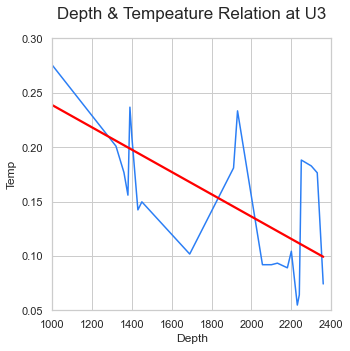

In [313]:
fig,ax=plt.subplots(figsize=(5,5))
#sns.set_palette("PuBuGn_d")
sns.set_style('whitegrid')
sns.lineplot(data=final_new,x=final_new['Depth'],y=final_new['Temp'],ax=ax,ci=None,color='#2B7EF5')
sns.regplot(data=final_new,x=final_new['Depth'],y=final_new['Temp'],
            ax=ax,color='red',scatter=False,ci=10)
ax.axes.set_title('Depth & Tempeature Relation at U3',fontsize=17,y=1.05)
ax.set(ylim=(0.05, 0.3))
ax.set(xlim=(1000, 2400));

### 월별 선형회귀식 만들기

In [314]:
copy = final_new.copy()  
copy['Year'] = copy['Time_day'].dt.year
copy['Month'] = copy['Time_day'].dt.month
copy.drop(['Time_day'],axis = 1, inplace = True)
copy = copy[['Year',"Month","Depth","Temp"]]
copy

,Year,Month,Depth,Temp
0,1996,11,1000.0,0.236667
1,1996,11,1320.0,0.210000
2,1996,11,1910.0,0.176208
3,1996,11,1000.0,0.246667
4,1996,11,1320.0,0.200000
...,...,...,...,...
16886,2020,11,1400.0,0.256983
16890,2020,11,2200.0,0.129931
16889,2020,11,1400.0,0.258810
16893,2020,11,2200.0,0.135252


In [315]:
# 월별로 쪼개서 각각 데이터프레임으로 만들기
from sklearn.linear_model import LinearRegression
X_new = np.array([[1500]])

for y in range(1996,2021):  # 년
    for m in range(1,13):   # 월
        try:
            globals()["month_{}_{}".format(y,m)] = copy[(copy['Year'] == y) & (copy['Month'] == m)]
            Y = globals()["month_{}_{}".format(y,m)]['Temp']
            X = globals()["month_{}_{}".format(y,m)][['Depth']]
            model = LinearRegression()
            model.fit(X, Y)
            print(model.coef_, model.intercept_)
            globals()["month_{}_{}".format(y,m)]['Temp_1500m'] = float(model.predict(X_new))  # Temp_1500m 컬럼에 predict값 채우기
        except:
            pass

[-6.34967318e-05] 0.2944230101693017
[-6.50038411e-05] 0.30070537121414725
[-5.71094645e-05] 0.2832331262856384
[-5.92817584e-05] 0.28860922870438654
[-5.57998321e-05] 0.2812547121852025
[-5.29375391e-05] 0.27494505513843276
[-5.09209764e-05] 0.2740585454268698
[-5.62651533e-05] 0.28751743095747095
[-6.01220387e-05] 0.29911162148525916
[0.] 0.18498219086021508
[0.] 0.18747222222222218
[-6.75619911e-05] 0.31716100628364097
[0.] 0.2170986111111111
[0.] 0.20780779569892477
[0.] 0.20637096774193547
[0.] 0.21375892857142859
[0.] 0.2238252688172043
[0.] 0.22046944444444444
[0.] 0.2142365591397849
[0.] 0.19782361111111113
[0.] 0.20578763440860218
[0.] 0.19865658602150538
[0.] 0.2121638888888889
[9.09716912e-05] 0.06224194372048916
[0.00013658] -0.029019457547169836
[0.00013499] -0.02944903885169395
[0.00013725] -0.03330759281801576
[0.00013936] -0.03302056659928129
[0.00013289] -0.026956152363562608
[0.00014319] -0.03908281362642005
[-7.09069931e-05] 0.33793020572590743
[-6.35508485e-05] 0.32

In [316]:
# time, temp_1500m컬럼 남기고 모든 컬럼 자르기 & 날짜 병합 & 날짜 형식으로 변환
def get_date(year, month):
    year = str(int(year))
    month = str(int(month))
    return year + '-' + month

for y in range(1996,2021):
    for m in range(1,13):
        try:
            globals()["month_{}_{}".format(y,m)].drop(['Depth','Temp'], axis = 1, inplace = True)
            globals()["month_{}_{}".format(y,m)]['Time_month'] = globals()["month_{}_{}".format(y,m)].apply(
                                lambda x: get_date(x['Year'],x['Month']),axis = 1) # 분리되어있는 년,월 필드 합치기
            globals()["month_{}_{}".format(y,m)]['Time_month'] = pd.to_datetime(
                                globals()["month_{}_{}".format(y,m)]['Time_month']).dt.strftime('%Y-%m') 
            globals()["month_{}_{}".format(y,m)] = globals()["month_{}_{}".format(y,m)][['Time_month','Temp_1500m']]
        except:
            pass

In [317]:
concat_list = [month_1996_11,month_1996_12,month_1997_1,month_1997_2,month_1997_3,month_1997_4,
              month_1997_5,month_1997_6,month_1997_7,month_1997_8,month_1997_9,month_1997_10,
              month_1997_11,month_1997_12,month_1998_1,month_1998_2,month_1998_3,month_1998_4,
              month_1998_5,month_1998_6,month_1998_7,month_1998_8,month_1998_9,month_1998_10,
              month_1998_11,month_1998_12,month_1999_1,month_1999_2,month_1999_3,month_1999_4,
              month_1999_5,month_1999_6,month_1999_7,month_1999_8,month_1999_9,month_1999_10,
              month_1999_11,month_1999_12,month_2000_1,month_2000_2,month_2000_3,month_2000_4,
              month_2000_5,month_2000_6,month_2000_7,month_2000_8,month_2000_9,month_2000_10,
              month_2000_11,month_2000_12,month_2001_1,month_2001_2,month_2001_3,month_2001_4,
              month_2001_5,month_2001_6,month_2001_7,month_2001_8,month_2001_9,month_2001_10
              ,month_2001_11,month_2001_12,month_2002_1,month_2002_2,month_2002_3,month_2002_4
              ,month_2002_5,month_2002_6,month_2002_7,month_2002_8,month_2002_9,month_2002_10
              ,month_2002_11,month_2002_12,month_2003_1,month_2003_2,month_2003_3,month_2003_4
              ,month_2003_5,month_2003_6,month_2003_7,month_2003_8,month_2003_9,month_2003_10
              ,month_2003_11,month_2003_12,month_2004_1,month_2004_2,month_2004_3,month_2004_4
              ,month_2004_5,month_2004_6,month_2004_7,month_2004_8,month_2004_9,month_2004_10
              ,month_2004_11,month_2004_12,month_2005_1,month_2005_2,month_2005_3,month_2005_4
              ,month_2005_5,month_2005_6,month_2005_7,month_2005_8,month_2005_9,month_2005_10
              ,month_2005_11,month_2005_12,month_2006_1,month_2006_2,month_2006_3,month_2006_4
              ,month_2006_5,month_2006_6,month_2006_7,month_2006_8,month_2006_9,month_2006_10
              ,month_2006_11,month_2006_12,month_2007_1,month_2007_2,month_2007_3,month_2007_4
              ,month_2007_5,month_2007_6,month_2007_7,month_2007_8,month_2007_9,month_2007_10
              ,month_2007_11,month_2007_12,month_2008_1,month_2008_2,month_2008_3,month_2008_4
              ,month_2008_5,month_2008_6,month_2008_7,month_2008_8,month_2008_9,month_2008_10
              ,month_2008_11,month_2008_12,month_2009_1,month_2009_2,month_2009_3,month_2009_4
              ,month_2009_5,month_2009_6,month_2009_7,month_2009_8,month_2009_9,month_2009_10
              ,month_2009_11,month_2009_12,month_2010_1,month_2010_2,month_2010_3,month_2010_4
              ,month_2010_5,month_2010_6,month_2010_7,month_2010_8,month_2010_9,month_2010_10
              ,month_2010_11,month_2010_12,month_2011_1,month_2011_2,month_2011_3,month_2011_4
              ,month_2011_5,month_2011_6,month_2011_7,month_2011_8,month_2011_9,month_2011_10
              ,month_2011_11,month_2011_12,month_2012_1,month_2012_2,month_2012_3,month_2012_4
              ,month_2012_5,month_2012_6,month_2012_7,month_2012_8,month_2012_9,month_2012_10
              ,month_2012_11,month_2012_12,month_2013_1,month_2013_2,month_2013_3,month_2013_4
              ,month_2013_5,month_2013_6,month_2013_7,month_2013_8,month_2013_9,month_2013_10
              ,month_2013_11,month_2013_12,month_2014_1,month_2014_2,month_2014_3,month_2014_4
              ,month_2014_5,month_2014_6,month_2014_7,month_2014_8,month_2014_9,month_2014_10
              ,month_2014_11,month_2014_12,month_2015_1,month_2015_2,month_2015_3,month_2015_4
              ,month_2015_5,month_2015_6,month_2015_7,month_2015_8,month_2015_9,month_2015_10
              ,month_2015_11,month_2015_12,month_2016_1,month_2016_2,month_2016_3,month_2016_4
              ,month_2016_5,month_2016_6,month_2016_7,month_2016_8,month_2016_9,month_2016_10
              ,month_2016_11,month_2016_12,month_2017_1,month_2017_2,month_2017_3,month_2017_4
              ,month_2017_5,month_2017_6,month_2017_7,month_2017_8,month_2017_9,month_2017_10
              ,month_2017_11,month_2017_12,month_2018_1,month_2018_2,month_2018_3,month_2018_4
              ,month_2018_5,month_2018_6,month_2018_7,month_2018_8,month_2018_9,month_2018_10
              ,month_2018_11,month_2018_12,month_2019_1,month_2019_2,month_2019_3,month_2019_4
              ,month_2019_5,month_2019_6,month_2019_7,month_2019_8,month_2019_9,month_2019_10
              ,month_2019_11,month_2019_12,month_2020_1,month_2020_2,month_2020_3,month_2020_4
              ,month_2020_5,month_2020_6,month_2020_7,month_2020_8,month_2020_9,month_2020_10
              ,month_2020_11]

concat = pd.concat(concat_list,ignore_index = True)
concat.drop_duplicates(ignore_index = True,inplace = True)
concat = concat[['Time_month','Temp_1500m']]
concat['Time_month'] = pd.to_datetime(concat['Time_month'])
concat

,Time_month,Temp_1500m
0,1996-11-01,0.199178
1,1996-12-01,0.203200
2,1997-01-01,0.197569
3,1997-02-01,0.199687
4,1997-03-01,0.197555
...,...,...
237,2020-07-01,0.234911
238,2020-08-01,0.234550
239,2020-09-01,0.238907
240,2020-10-01,0.237585


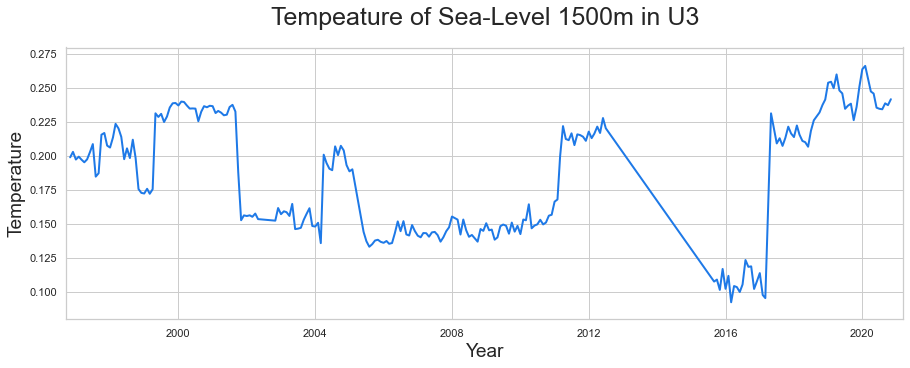

In [318]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style('whitegrid')
ax = sns.lineplot(data=concat,x='Time_month',y='Temp_1500m',linewidth=2,color='#1E79E7')
ax.axes.set_title('Tempeature of Sea-Level 1500m in U3',fontsize=25,y=1.06)
ax.set_xlabel("Year",fontsize=19)
ax.set_ylabel("Temperature",fontsize=19)
ax.set(ylim=(0.08, 0.28))
ax.set(xlim=(9760,18700));

## 수온과 기온

In [319]:
air_temp = pd.read_csv('real_df_기온.csv',index_col = 0)
water_temp = pd.read_csv('real_df_수온.csv',index_col = 0)

In [320]:
air_temp

,record_time,air_temp
0,2012-01-01 00:00:19,3.5
1,2012-01-01 00:01:19,3.9
2,2012-01-01 00:02:19,4.2
3,2012-01-01 00:03:19,4.5
4,2012-01-01 00:04:19,4.6
...,...,...
4591995,2020-12-31 23:55:13,0.3
4591996,2020-12-31 23:56:13,0.3
4591997,2020-12-31 23:57:13,0.3
4591998,2020-12-31 23:58:12,0.3


In [321]:
water_temp

,record_time,water_temp
0,2012-01-04 10:04:57,14.2
1,2012-01-04 10:05:57,14.2
2,2012-01-04 10:06:57,14.2
3,2012-01-04 10:07:57,14.2
4,2012-01-04 10:08:57,14.2
...,...,...
4521415,2020-12-31 23:55:13,13.3
4521416,2020-12-31 23:56:13,13.3
4521417,2020-12-31 23:57:13,13.3
4521418,2020-12-31 23:58:12,13.3


In [322]:
air_temp['record_time'] = pd.to_datetime(air_temp['record_time'])
water_temp['record_time'] = pd.to_datetime(water_temp['record_time'])

air_temp['Time_day'] = air_temp['record_time'].apply(lambda dt: datetime.datetime(dt.year, 
                                                             dt.month, dt.day))
water_temp['Time_day'] = water_temp['record_time'].apply(lambda dt: datetime.datetime(dt.year, 
                                                             dt.month, dt.day))
air_temp.drop(['record_time'],axis = 1, inplace = True)
water_temp.drop(['record_time'],axis = 1, inplace = True)

In [323]:
# 일별 수온 및 기온 평균
air_temp_new = air_temp.groupby(['Time_day'])['air_temp'].mean().reset_index().sort_values(
                                                                       by = ['Time_day'])
water_temp_new = water_temp.groupby(['Time_day'])['water_temp'].mean().reset_index().sort_values(
                                                                       by = ['Time_day'])

In [324]:
air_temp_new

,Time_day,air_temp
0,2012-01-01,4.084262
1,2012-01-02,1.944189
2,2012-01-03,2.542549
3,2012-01-04,0.805626
4,2012-01-05,1.757153
...,...,...
3227,2020-12-27,7.611736
3228,2020-12-28,9.041667
3229,2020-12-29,8.513194
3230,2020-12-30,-0.399166


In [325]:
water_temp_new

,Time_day,water_temp
0,2012-01-04,14.173206
1,2012-01-05,13.813119
2,2012-01-06,13.612910
3,2012-01-07,13.719386
4,2012-01-08,13.680332
...,...,...
3210,2020-12-27,13.866944
3211,2020-12-28,13.367431
3212,2020-12-29,13.746875
3213,2020-12-30,13.414812


In [326]:
# 기온, 수온 DF 병합
df = pd.merge(air_temp_new, water_temp_new, how = 'inner', on = 'Time_day')
df.reset_index(drop = True, inplace = True)

# 기온과 수온 차이
df['difference'] = df.apply(lambda x: abs(x['air_temp'] - x['water_temp']), axis = 1)

df['Year'] = df['Time_day'].dt.year
df['Month'] = df['Time_day'].dt.month
df['Day'] = df['Time_day'].dt.day

df

,Time_day,air_temp,water_temp,difference,Year,Month,Day
0,2012-01-04,0.805626,14.173206,13.367580,2012,1,4
1,2012-01-05,1.757153,13.813119,12.055967,2012,1,5
2,2012-01-06,2.212840,13.612910,11.400070,2012,1,6
3,2012-01-07,2.221409,13.719386,11.497978,2012,1,7
4,2012-01-08,4.188518,13.680332,9.491815,2012,1,8
...,...,...,...,...,...,...,...
3210,2020-12-27,7.611736,13.866944,6.255208,2020,12,27
3211,2020-12-28,9.041667,13.367431,4.325764,2020,12,28
3212,2020-12-29,8.513194,13.746875,5.233681,2020,12,29
3213,2020-12-30,-0.399166,13.414812,13.813978,2020,12,30


In [327]:
a = df.groupby(['Year'])['difference'].mean().reset_index()
print(pearsonr(a['Year'], a['difference']))

(0.4429598448503248, 0.23244280227462924)


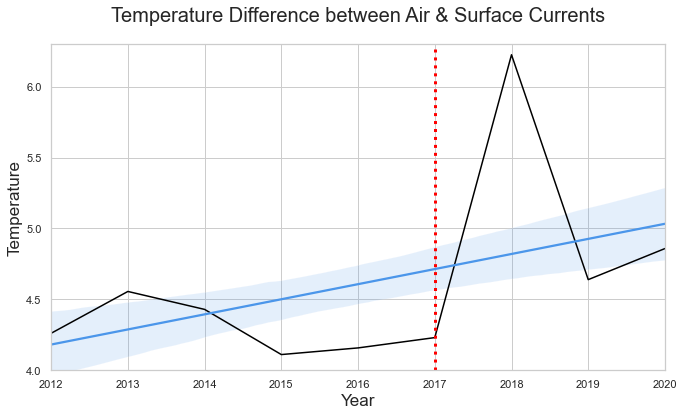

In [328]:
fig,ax=plt.subplots(figsize=(11,6))
sns.set_style('whitegrid')
sns.lineplot(data=df,x=df['Year'],y=df['difference'],
             ax=ax,ci=None,color='black');
sns.regplot(data=df,x=df['Year'],y=df['difference'],
            ax=ax,scatter=False,color='#4B96EA')
ax.axes.set_title('Temperature Difference between Air & Surface Currents',fontsize=20,y=1.05)
ax.axvline(2017,color='red',linewidth=3,linestyle=':')
ax.set_xlabel("Year",fontsize=17)
ax.set_ylabel("Temperature",fontsize=17)
ax.set(ylim=(4.0, 6.3))
ax.set(xlim=(2012, 2020));